<a href="https://colab.research.google.com/github/lilasu086/Individual_Coding_Project/blob/main/UnsupervisedMachineLearning_DimensionReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Prep - Dimension Reduction

We will use [Hepatitis C Prediction dataset](https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset). The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values.

Opendatasets is a python package which makes it easier to import datasets from Kaggle.

Prerequisites:

- Kaggle Account (preferrably using BU email ID)

Run the following two cells. In the second cell you will be prompted to enter username and key.

Use this link - https://www.kaggle.com/settings/account

- On the right side of your screen you can see your username.
- Scroll down a bit, you will see an API subheading. Click on '**Create new token**'.
- It should automatically download a .json file containing your username and key.
- Copy paste them into the output of the 2nd cell.

Your dataset will be visible in the folders tab on the left side of your colab screen!!

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

od.download(
    "https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset")

Skipping, found downloaded files in "./hepatitis-c-dataset" (use force=True to force download)


### This cell is for installing any python packages you want to use

In [ ]:
!pip install your-package-name

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Question 1 **(3 Points)**

Normalize the features so that all the features have a mean of 0 and standard deviation = 1. Perform any other necessary pre-processing. Clearly state any assumptions you make.

In [ ]:
df = pd.read_csv('/content/hepatitis-c-dataset/HepatitisCdata.csv', index_col=0)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
# see the null values in each column
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [ ]:
# normalize each numeric column
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


df[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']] = sc.fit_transform(df[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']])
one_hot_encoded = pd.get_dummies(df[['Category', 'Sex']])
#one_hot_encoded = one_hot_encoded.drop(columns=['Category_0=Blood Donor','Sex_f'], axis=1)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop(['Category', 'Sex'], inplace = True, axis=1)

In [ ]:
# drop null values
df = df.dropna().reset_index(drop=True)
df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32,-0.540208,-0.606922,-0.815390,-0.383693,-0.198236,-0.574734,-1.889127,0.497070,-0.502286,-0.563913,1,0,0,0,0,0,1
1,32,-0.540208,0.077522,-0.410658,-0.305057,-0.381375,1.349161,-0.501947,-0.146590,-0.438203,0.825430,1,0,0,0,0,0,1
2,32,0.914106,0.246711,0.304499,0.538767,-0.269457,0.291926,-0.148525,0.094783,-0.115957,1.344118,1,0,0,0,0,0,1
3,32,0.273516,-0.626148,0.084451,-0.368571,0.381706,-0.393234,-0.554960,-0.025903,-0.104971,0.677233,1,0,0,0,0,0,1
4,32,-0.419015,0.223639,0.163040,-0.302033,-0.091404,0.432588,-0.926053,-0.106361,-0.176378,-0.619487,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,58,-1.319304,-0.841479,-0.528541,3.484589,-0.172800,-0.878745,-1.226461,-0.508648,0.186149,1.584937,0,0,0,0,1,1,0
585,59,-0.453641,-0.653064,-0.347787,7.591802,1.455107,-1.101082,-0.758178,1.102513,1.127255,-0.286045,0,0,0,0,1,1,0
586,62,-1.665569,13.393420,-0.886120,2.283879,1.963828,-1.191832,0.823385,-0.514683,11.193789,-0.656536,0,0,0,0,1,1,0
587,64,-3.050630,1.327209,-1.004003,0.290761,0.437665,-3.020439,-2.074674,-0.367848,-0.066521,-0.137848,0,0,0,0,1,1,0


# Question 2 **(5 Points)**

We will first use Principal Component Analysis only to analyze the provided dataset without losing information. Create the appropriate PCA model and use it to Transform the data.

In [ ]:
from sklearn.decomposition import PCA

# Create the model
model = PCA()

#fit the data
model.fit(df)

PCA()

In [ ]:
transformed_data = model.transform(df)

transformed_data_df = pd.DataFrame(transformed_data, columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11', 'PC12','PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-15.426999,1.434530,-1.408293,0.284315,0.803170,-0.491361,-0.594034,0.264823,-0.593455,0.064353,-0.521817,0.170720,-0.152372,-0.008413,0.057545,0.027775,2.913828e-16,-2.870688e-16
1,-15.433533,-0.445522,0.159117,0.292208,-0.182655,-0.295507,-0.068787,0.295657,-1.264769,-0.853720,-0.756627,0.115456,-0.089217,0.036617,-0.042645,0.022236,3.468939e-16,-4.674800e-16
2,-15.446182,-0.476660,1.145013,-0.712554,0.230573,-0.032476,-0.504493,-0.013272,0.140043,-0.382160,-0.305677,0.493569,-0.092126,0.010844,-0.000891,0.053372,-4.168415e-17,5.293705e-17
3,-15.441627,0.264128,-0.143712,-0.567640,0.289860,0.118298,-0.064139,0.399930,0.280570,0.105267,-0.702341,-0.230765,-0.099142,0.017258,0.019907,0.028182,1.248493e-16,-2.574101e-18
4,-15.405132,0.756465,-0.120218,0.757534,-0.342434,-0.530369,-0.359991,0.742840,-0.453444,-0.096458,-0.225165,0.098536,-0.078119,0.020573,-0.004488,-0.050714,6.933816e-17,-2.315576e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,10.587396,1.943027,0.183148,-3.010612,-0.257192,-0.603186,-0.186037,-2.194440,-0.611761,-1.858619,-0.081560,0.363577,0.082938,0.141357,-0.703108,-0.070369,3.468939e-16,-8.237138e-17
585,11.656662,4.448035,2.326281,-4.089144,0.494180,-1.869484,1.384211,-2.438866,-0.111292,-1.383092,2.645426,1.764849,-0.697789,-0.042073,-0.292454,0.105944,-4.857734e-16,5.282513e-16
586,15.074247,7.277939,12.133047,4.345511,-2.303678,7.512923,-3.516099,0.400484,-3.372763,1.829535,0.348966,0.707107,0.079678,0.149320,-0.037414,-0.208303,-1.527064e-16,6.392736e-16
587,16.665758,3.734254,-1.653722,0.043435,0.013431,1.591460,-1.124031,-0.693184,-0.090274,-1.568787,-1.139791,0.083922,0.705277,0.144600,-0.595024,-0.229558,5.689385e-16,-2.489048e-16


# Question 3 **(5 Points)**

Find out the amount of variance captured by each principal component. Construct a scree plot to visualize this.

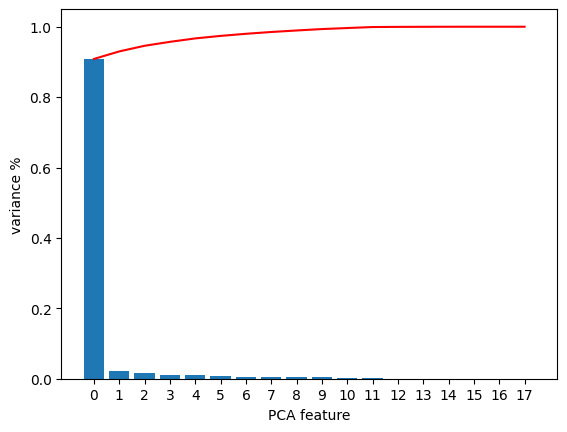

In [ ]:
import matplotlib.pyplot as plt

component_ids = range(model.n_components_)
plt.bar(component_ids, model.explained_variance_ratio_)
plt.plot(component_ids, np.cumsum(model.explained_variance_ratio_), color='red')
plt.xticks(component_ids)
plt.ylabel('variance %')
plt.xlabel('PCA feature')
plt.show()

# Question 4 **(5 Points)**

Which components are required to capture at least 85% of the variance? Explain concisely through concepts and visualizations.

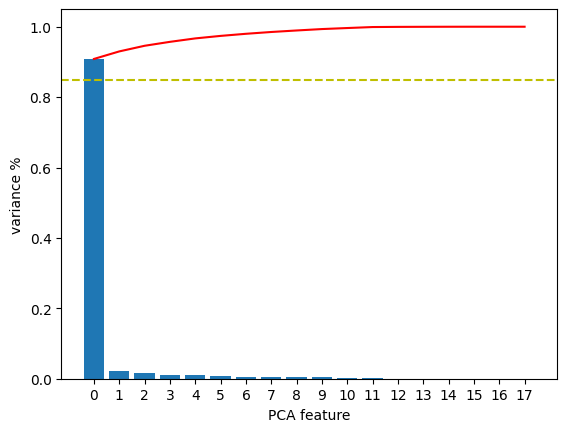

In [ ]:
component_ids = range(model.n_components_)
plt.bar(component_ids, model.explained_variance_ratio_)
plt.plot(component_ids, np.cumsum(model.explained_variance_ratio_), color='red')
plt.xticks(component_ids)
plt.ylabel('variance %')
plt.xlabel('PCA feature')
plt.axhline(y=0.85, color='y', linestyle='--')
plt.show()

In [ ]:
components_df = pd.DataFrame(model.components_, index = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11', 'PC12','PC13','PC14', 'PC15', 'PC16','PC17','PC18'])
components_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
PC1,9.992450e-01,-1.951613e-02,1.809724e-02,-3.303548e-03,7.453789e-03,3.660148e-03,-7.767179e-03,1.250971e-02,-2.554154e-03,1.463278e-02,-1.618854e-02,-0.002258,0.001242,-0.002332,0.000461,0.002886,0.000718,-0.000718
PC2,-2.338358e-02,-4.353837e-01,1.232894e-01,-2.352388e-02,3.496000e-01,2.867693e-01,-4.514307e-01,-3.873581e-01,8.277934e-02,2.893519e-01,-3.521872e-01,-0.116912,0.019462,0.009067,0.004724,0.083659,0.006507,-0.006507
PC3,-1.172808e-02,1.513589e-01,4.568129e-01,3.069267e-01,3.367673e-01,6.830343e-02,2.528369e-01,2.539642e-01,1.805125e-01,5.499081e-01,2.582327e-01,-0.061423,0.009660,0.019738,0.003742,0.028283,-0.102058,0.102058
PC4,-1.760692e-02,-3.407883e-01,4.319051e-01,8.666078e-02,-4.521561e-01,-2.879730e-01,1.292954e-01,1.973273e-01,3.368778e-01,-1.258120e-02,-4.641168e-01,0.086492,0.023829,-0.044808,-0.033342,-0.032170,0.051088,-0.051088
PC5,1.400201e-02,2.670255e-01,-6.596661e-02,-2.697288e-01,-1.141780e-01,1.092894e-01,-1.074037e-01,-2.257513e-01,8.374620e-01,-6.213183e-02,1.873551e-01,-0.025136,-0.028539,-0.002524,0.001675,0.054524,-0.097936,0.097936
PC6,-9.919908e-03,6.609378e-02,4.343329e-01,-4.049988e-01,-3.083497e-01,3.299637e-01,-3.724583e-01,2.373441e-01,-1.935794e-01,7.496447e-02,2.915750e-01,0.050364,-0.035379,-0.033098,-0.022707,0.040819,0.233106,-0.233106
PC7,-1.038123e-02,-3.146558e-01,-3.625149e-01,-1.459039e-01,1.138367e-01,4.668907e-01,1.456129e-01,6.562850e-01,1.778610e-01,-6.465235e-02,-1.172716e-01,-0.078689,-0.009025,0.028183,0.007378,0.052152,-0.054364,0.054364
PC8,4.210936e-03,1.712657e-01,2.205721e-01,1.720269e-01,-2.944243e-01,6.094551e-01,2.351145e-01,-2.420754e-01,-1.795694e-01,-1.791981e-01,-1.983841e-01,0.054121,0.009634,-0.034755,-0.025420,-0.003579,-0.325425,0.325425
PC9,2.828117e-03,1.971984e-01,-5.910260e-02,6.703907e-01,-3.440442e-02,6.341539e-02,-5.942512e-01,2.624557e-01,1.226977e-01,-2.313925e-01,-1.069844e-02,0.082006,0.017989,-0.062273,-0.025311,-0.012411,0.016317,-0.016317
PC10,-4.293733e-03,4.366784e-01,-2.528650e-01,-1.993030e-01,-2.145431e-01,-1.238837e-01,-2.200175e-01,1.780712e-01,-1.174698e-01,5.434669e-01,-4.349667e-01,-0.010570,0.003412,0.045043,0.003496,-0.041381,-0.175940,0.175940


Answer

From the scree plot, it appears that a single component can capture at least 85% of the variance. This suggests that the variance in the data across the other 17 dimensions is relatively small or considered secondary and can be ignored or discarded.

This scenario may occur because of the inclusion of redundant or highly correlated information in the data. For instance, converting categorical variables into dummy variables can introduce high levels of correlation among the variables. As a result, much of the variance in the data can be captured by just one principal component.

# Question 5 **(5 Points)**

1. Perform K-means clustering using the original features. Explain how you decided on the optimal number of clusters.
2. Using the same number of clusters, perform clustering but using the principal components that capture 85% of the variance this time.
3. Choose an appropriate metric and measure whether using PCA has helped or hurt the clustering outcome. Explain your answer.

In [ ]:
from sklearn.cluster import KMeans

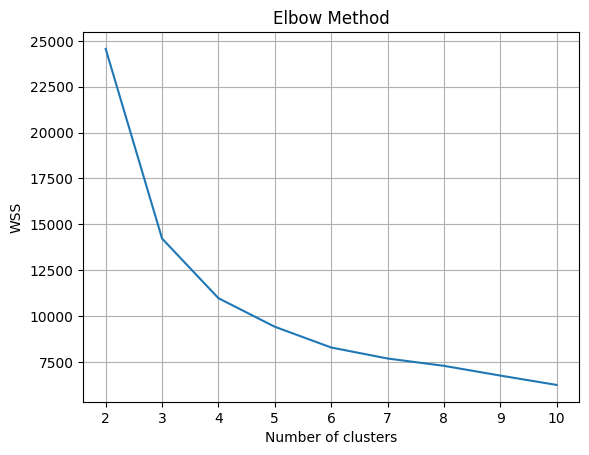

In [ ]:
K = range(2, 11)
wss = []
for k in K:
  kmeans = KMeans(n_clusters=k ,init='random')
  kmeans.fit(df)
  wss.append(kmeans.inertia_)

result_df = pd.DataFrame({'cluster': K, 'wss': wss})

plt.plot(range(2, 11), wss)
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Elbow Method')
plt.grid()
plt.show();

In [ ]:
num_clusters = 3
kmeans_result = KMeans(num_clusters,init='random').fit(df)
df['cluster_labels'] = kmeans_result.labels_
df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m,cluster_labels
0,32,-0.540208,-0.606922,-0.815390,-0.383693,-0.198236,-0.574734,-1.889127,0.497070,-0.502286,-0.563913,1,0,0,0,0,0,1,2
1,32,-0.540208,0.077522,-0.410658,-0.305057,-0.381375,1.349161,-0.501947,-0.146590,-0.438203,0.825430,1,0,0,0,0,0,1,2
2,32,0.914106,0.246711,0.304499,0.538767,-0.269457,0.291926,-0.148525,0.094783,-0.115957,1.344118,1,0,0,0,0,0,1,2
3,32,0.273516,-0.626148,0.084451,-0.368571,0.381706,-0.393234,-0.554960,-0.025903,-0.104971,0.677233,1,0,0,0,0,0,1,2
4,32,-0.419015,0.223639,0.163040,-0.302033,-0.091404,0.432588,-0.926053,-0.106361,-0.176378,-0.619487,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,58,-1.319304,-0.841479,-0.528541,3.484589,-0.172800,-0.878745,-1.226461,-0.508648,0.186149,1.584937,0,0,0,0,1,1,0,0
585,59,-0.453641,-0.653064,-0.347787,7.591802,1.455107,-1.101082,-0.758178,1.102513,1.127255,-0.286045,0,0,0,0,1,1,0,0
586,62,-1.665569,13.393420,-0.886120,2.283879,1.963828,-1.191832,0.823385,-0.514683,11.193789,-0.656536,0,0,0,0,1,1,0,0
587,64,-3.050630,1.327209,-1.004003,0.290761,0.437665,-3.020439,-2.074674,-0.367848,-0.066521,-0.137848,0,0,0,0,1,1,0,0


In [ ]:
df['cluster_labels'].value_counts()

1    246
2    196
0    147
Name: cluster_labels, dtype: int64

In [ ]:
df_PCA = df.drop('cluster_labels', axis=1)
df_PCA

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32,-0.540208,-0.606922,-0.815390,-0.383693,-0.198236,-0.574734,-1.889127,0.497070,-0.502286,-0.563913,1,0,0,0,0,0,1
1,32,-0.540208,0.077522,-0.410658,-0.305057,-0.381375,1.349161,-0.501947,-0.146590,-0.438203,0.825430,1,0,0,0,0,0,1
2,32,0.914106,0.246711,0.304499,0.538767,-0.269457,0.291926,-0.148525,0.094783,-0.115957,1.344118,1,0,0,0,0,0,1
3,32,0.273516,-0.626148,0.084451,-0.368571,0.381706,-0.393234,-0.554960,-0.025903,-0.104971,0.677233,1,0,0,0,0,0,1
4,32,-0.419015,0.223639,0.163040,-0.302033,-0.091404,0.432588,-0.926053,-0.106361,-0.176378,-0.619487,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,58,-1.319304,-0.841479,-0.528541,3.484589,-0.172800,-0.878745,-1.226461,-0.508648,0.186149,1.584937,0,0,0,0,1,1,0
585,59,-0.453641,-0.653064,-0.347787,7.591802,1.455107,-1.101082,-0.758178,1.102513,1.127255,-0.286045,0,0,0,0,1,1,0
586,62,-1.665569,13.393420,-0.886120,2.283879,1.963828,-1.191832,0.823385,-0.514683,11.193789,-0.656536,0,0,0,0,1,1,0
587,64,-3.050630,1.327209,-1.004003,0.290761,0.437665,-3.020439,-2.074674,-0.367848,-0.066521,-0.137848,0,0,0,0,1,1,0


In [ ]:
model = PCA(n_components=1, whiten=True)

model.fit(df_PCA)
transformed_data = model.transform(df_PCA)

In [ ]:
transformed_data_df = pd.DataFrame(transformed_data, columns = ['PC1'])
transformed_data_df

,PC1
0,-1.552211
1,-1.552869
2,-1.554142
3,-1.553683
4,-1.550011
...,...
584,1.065267
585,1.172853
586,1.516719
587,1.676851


In [ ]:
num_clusters = 3
kmeans_result_2 = KMeans(num_clusters,init='random').fit(transformed_data_df)
transformed_data_df['cluster_labels'] = kmeans_result_2.labels_
transformed_data_df

,PC1,cluster_labels
0,-1.552211,1
1,-1.552869,1
2,-1.554142,1
3,-1.553683,1
4,-1.550011,1
...,...,...
584,1.065267,0
585,1.172853,0
586,1.516719,0
587,1.676851,0


In [ ]:
transformed_data_df['cluster_labels'].value_counts()

2    246
1    196
0    147
Name: cluster_labels, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_df = silhouette_score(df, df['cluster_labels'])
silhouette_transformed_df = silhouette_score(transformed_data_df, transformed_data_df['cluster_labels'])
print('original data:', silhouette_df)
print('PCA data:',silhouette_transformed_df)

original data: 0.46408857307099477
PCA data: 0.7612879484416518


In [ ]:
df.drop('cluster_labels', axis=1, inplace = True)
df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32,-0.540208,-0.606922,-0.815390,-0.383693,-0.198236,-0.574734,-1.889127,0.497070,-0.502286,-0.563913,1,0,0,0,0,0,1
1,32,-0.540208,0.077522,-0.410658,-0.305057,-0.381375,1.349161,-0.501947,-0.146590,-0.438203,0.825430,1,0,0,0,0,0,1
2,32,0.914106,0.246711,0.304499,0.538767,-0.269457,0.291926,-0.148525,0.094783,-0.115957,1.344118,1,0,0,0,0,0,1
3,32,0.273516,-0.626148,0.084451,-0.368571,0.381706,-0.393234,-0.554960,-0.025903,-0.104971,0.677233,1,0,0,0,0,0,1
4,32,-0.419015,0.223639,0.163040,-0.302033,-0.091404,0.432588,-0.926053,-0.106361,-0.176378,-0.619487,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,58,-1.319304,-0.841479,-0.528541,3.484589,-0.172800,-0.878745,-1.226461,-0.508648,0.186149,1.584937,0,0,0,0,1,1,0
585,59,-0.453641,-0.653064,-0.347787,7.591802,1.455107,-1.101082,-0.758178,1.102513,1.127255,-0.286045,0,0,0,0,1,1,0
586,62,-1.665569,13.393420,-0.886120,2.283879,1.963828,-1.191832,0.823385,-0.514683,11.193789,-0.656536,0,0,0,0,1,1,0
587,64,-3.050630,1.327209,-1.004003,0.290761,0.437665,-3.020439,-2.074674,-0.367848,-0.066521,-0.137848,0,0,0,0,1,1,0


In [ ]:
transformed_data_df.drop('cluster_labels', axis=1, inplace = True)
transformed_data_df

,PC1
0,-1.552211
1,-1.552869
2,-1.554142
3,-1.553683
4,-1.550011
...,...
584,1.065267
585,1.172853
586,1.516719
587,1.676851


Perform K-means clustering using the original features. Explain how you decided on the optimal number of clusters.
Using the same number of clusters, perform clustering but using the principal components that capture 85% of the variance this time.
Choose an appropriate metric and measure whether using PCA has helped or hurt the clustering outcome. Explain your answer.

Answer

1. I think the optimal number of clusters is 3 because there is one turning point at 3 clusters in the plot.
3. To determine whether using PCA has improved or hindered the clustering outcome, I utilized silhouette scores as a metric. Specifically, the silhouette score of the original data is 46.41%, while the silhouette score of the PCA-transformed data is 76.13%. Therefore, it can be concluded that using PCA has improved the clustering outcome.


# Question 6 **(7 Points)**

1. Using the PCA model with 85% of the variance, we want to reconstruct the original data using inverse PCA.

2. Find the percentage of patients that were significantly and unfavorably affected by the dimensionality reduction we performed. What do you think is a good threshold for deciding whether "the reconstruction" was poor? Justify your answer. It may be helpful to use a [cumulative histogram](https://matplotlib.org/stable/gallery/statistics/histogram_cumulative.html) to answer the question visually.

3. Find the patient that was least faithfully reconstructed. Which original attribute(s) were most unfavorably affected by the dimensionality reduction in his/her case?

In [ ]:
reconstruced_data = model.inverse_transform(transformed_data_df)

In [ ]:
reconstruced_data_df = pd.DataFrame(reconstruced_data, columns=df.columns)
reconstruced_data_df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32.002306,0.301782,-0.285370,-0.022730,-0.145643,-0.075724,0.123000,-0.172452,0.047072,-0.250177,0.221216,0.927867,-0.007283,0.069930,0.013265,-0.003779,0.372626,0.627374
1,31.995776,0.301910,-0.285489,-0.022709,-0.145691,-0.075748,0.123051,-0.172533,0.047089,-0.250273,0.221322,0.927881,-0.007291,0.069946,0.013262,-0.003798,0.372622,0.627378
2,31.983137,0.302157,-0.285717,-0.022667,-0.145786,-0.075795,0.123149,-0.172692,0.047121,-0.250458,0.221526,0.927910,-0.007307,0.069975,0.013256,-0.003834,0.372613,0.627387
3,31.987688,0.302068,-0.285635,-0.022682,-0.145752,-0.075778,0.123114,-0.172635,0.047110,-0.250391,0.221453,0.927900,-0.007301,0.069964,0.013259,-0.003821,0.372616,0.627384
4,32.024156,0.301356,-0.284975,-0.022802,-0.145480,-0.075644,0.122830,-0.172178,0.047017,-0.249857,0.220862,0.927817,-0.007256,0.069879,0.013275,-0.003716,0.372642,0.627358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,57.997060,-0.205918,0.185418,-0.108670,0.048263,0.019492,-0.079058,0.152981,-0.019372,0.130485,-0.199919,0.869137,0.025039,0.009267,0.025252,0.071305,0.391302,0.608698
585,59.065518,-0.226786,0.204769,-0.112202,0.056233,0.023406,-0.087364,0.166357,-0.022103,0.146132,-0.217229,0.866723,0.026368,0.006774,0.025744,0.074391,0.392069,0.607931
586,62.480523,-0.293484,0.266618,-0.123492,0.081707,0.035915,-0.113909,0.209110,-0.030832,0.196140,-0.272555,0.859008,0.030614,-0.001196,0.027319,0.084255,0.394523,0.605477
587,64.070832,-0.324544,0.295420,-0.128750,0.093570,0.041740,-0.126270,0.229019,-0.034897,0.219429,-0.298319,0.855415,0.032591,-0.004907,0.028053,0.088849,0.395665,0.604335


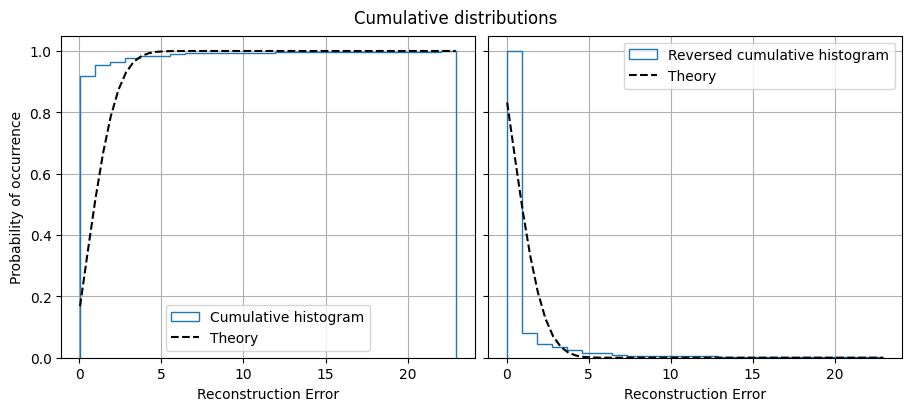

In [ ]:
reconstruction_error = np.square(df - reconstruced_data_df).mean(axis=1).values

mu = np.mean(reconstruction_error)
sigma = np.std(reconstruction_error)
n_bins = 25


fig = plt.figure(figsize=(9, 4), layout="constrained")
axs = fig.subplots(1, 2, sharex=True, sharey=True)

# Cumulative distributions.

n, bins, patches = axs[0].hist(reconstruction_error, n_bins, density=True, histtype="step",
                               cumulative=True, label="Cumulative histogram")
x = np.linspace(reconstruction_error.min(), reconstruction_error.max())
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (x - mu))**2))
y = y.cumsum()
y /= y[-1]
axs[0].plot(x, y, "k--", linewidth=1.5, label="Theory")

# Complementary cumulative distributions.

axs[1].hist(reconstruction_error, bins=bins, density=True, histtype="step", cumulative=-1,
            label="Reversed cumulative histogram")
axs[1].plot(x, 1 - y, "k--", linewidth=1.5, label="Theory")

# Label the figure.
fig.suptitle("Cumulative distributions")
for ax in axs:
    ax.grid(True)
    ax.legend()
    ax.set_xlabel("Reconstruction Error")
    ax.set_ylabel("Probability of occurrence")
    ax.label_outer()

plt.show()

In [ ]:
# Determine a threshold for poor reconstruction
threshold = 5  # Determine threshold from the histogram

# Calculate the percentage of patients significantly affected
affected_patients = sum(error > threshold for error in reconstruction_errors)
percentage_affected = (affected_patients / len(df)) * 100
print(f"Percentage of patients significantly affected: {percentage_affected:.2f}%")

Percentage of patients significantly affected: 1.70%


In [ ]:
from sklearn.metrics import mean_squared_error
reconstruction_errors = []
for i in range(len(df)):
    error = mean_squared_error(df.iloc[i], reconstruced_data_df.iloc[i])
    reconstruction_errors.append(error)

df['Reconstruction_Error'] = reconstruction_errors

In [ ]:
df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m,Reconstruction_Error
0,32,-0.540208,-0.606922,-0.815390,-0.383693,-0.198236,-0.574734,-1.889127,0.497070,-0.502286,-0.563913,1,0,0,0,0,0,1,0.339815
1,32,-0.540208,0.077522,-0.410658,-0.305057,-0.381375,1.349161,-0.501947,-0.146590,-0.438203,0.825430,1,0,0,0,0,0,1,0.191552
2,32,0.914106,0.246711,0.304499,0.538767,-0.269457,0.291926,-0.148525,0.094783,-0.115957,1.344118,1,0,0,0,0,0,1,0.159392
3,32,0.273516,-0.626148,0.084451,-0.368571,0.381706,-0.393234,-0.554960,-0.025903,-0.104971,0.677233,1,0,0,0,0,0,1,0.073464
4,32,-0.419015,0.223639,0.163040,-0.302033,-0.091404,0.432588,-0.926053,-0.106361,-0.176378,-0.619487,1,0,0,0,0,0,1,0.140275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,58,-1.319304,-0.841479,-0.528541,3.484589,-0.172800,-0.878745,-1.226461,-0.508648,0.186149,1.584937,0,0,0,0,1,1,0,1.258143
585,59,-0.453641,-0.653064,-0.347787,7.591802,1.455107,-1.101082,-0.758178,1.102513,1.127255,-0.286045,0,0,0,0,1,1,0,3.674707
586,62,-1.665569,13.393420,-0.886120,2.283879,1.963828,-1.191832,0.823385,-0.514683,11.193789,-0.656536,0,0,0,0,1,1,0,17.153051
587,64,-3.050630,1.327209,-1.004003,0.290761,0.437665,-3.020439,-2.074674,-0.367848,-0.066521,-0.137848,0,0,0,0,1,1,0,1.425483


In [ ]:
df[df['Reconstruction_Error']==df['Reconstruction_Error'].max()].drop('Reconstruction_Error', axis=1)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
569,46,-1.146172,1.588682,-1.02758,-0.471402,-0.020183,-0.497596,-1.120435,20.070365,1.209647,-0.545389,0,0,0,0,1,0,1


In [ ]:
pd.DataFrame(df.drop('Reconstruction_Error', axis=1).iloc[569]-reconstruced_data_df.iloc[569])

,569
Age,-0.022320
ALB,-1.174131
ALP,1.620137
ALT,-0.958499
AST,-0.430341
BIL,0.004187
CHE,-0.511618
CHOL,-1.123502
CREA,20.059129
GGT,1.254518


Using the PCA model with 85% of the variance, we want to reconstruct the original data using inverse PCA.

Find the percentage of patients that were significantly and unfavorably affected by the dimensionality reduction we performed. What do you think is a good threshold for deciding whether "the reconstruction" was poor? Justify your answer. It may be helpful to use a cumulative histogram to answer the question visually.

Find the patient that was least faithfully reconstructed. Which original attribute(s) were most unfavorably affected by the dimensionality reduction in his/her case?

Answer

1. Based on the cumulative histogram, I would select a threshold of 5 to determine whether 'the reconstruction' was poor. This threshold is chosen because the percentage of errors smaller than 5 is nearly 98%. Therefore, selecting this threshold would not significantly categorize a large number of patients as having a poor reconstruction error. However, it's important to note that 1.70% of patients are notably affected by the dimensionality reduction performed after calculation.

2. To identify the patient with the least faithful reconstruction, I generated a column named 'Reconstruction_Error' to observe the reconstruction error for each patient. Upon identifying the maximum reconstruction error, it corresponds to the 569th patient. Upon further examination, it was found that the most adversely impacted patient by the dimensionality reduction is CREA, with a reconstruction error of 20.06.